In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
trainc = pd.read_csv("C:/Users/HP/Downloads/Machine_Learning_Challenge/train_data.csv")

In [152]:
testc = pd.read_csv("C:/Users/HP/Downloads/Machine_Learning_Challenge/test_data.csv")

In [153]:
# For the purpose of easy processing
trainc = trainc.head(100)
testc = testc.head(100)

#  Classification

## K-Neighbors Classifier with 3 Neighbors

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
feature_names = [x for x in trainc.columns if x not in ["connection_id","target"]]
target = trainc['target']

In [156]:
knn = KNeighborsClassifier(n_neighbors=3)

In [157]:
knn.fit(trainc[feature_names],target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [158]:
pred = knn.predict(testc[feature_names])

In [159]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

## K-Neighbors Classifier with 5 Neighbors

In [160]:
knn1 =KNeighborsClassifier(n_neighbors=5)

In [161]:
knn1.fit(trainc[feature_names],target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [162]:
pred1 = knn1.predict(testc[feature_names])

In [163]:
pred1

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

## Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
lor = LogisticRegression()

In [166]:
lor.fit(trainc[feature_names],target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
predlor = lor.predict(testc[feature_names])

In [168]:
predlor

array([1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

### All produced different prediction results so to evaluate which is best, there are two evaluation methods

# 1-Testing on training dataset itself

## K-Neighbors Classifier with 3 neighbors

In [169]:
pred2 = knn.predict(trainc[feature_names])

In [170]:
accuracy_score(target,pred2)

0.75

## K-Neighbors Classifier with 5 neighbors

In [171]:
pred3 = knn1.predict(trainc[feature_names])

In [172]:
accuracy_score(target,pred3)

0.72999999999999998

## Logistic Regression

In [173]:
predlor1 = lor.predict(trainc[feature_names])

In [174]:
accuracy_score(target,predlor1)

0.78000000000000003

### But maximum accuracy will lead to complex modelling, thereby causing overfitting. So, the next step is 

#                                           2-Train/Test Split

In [175]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [176]:
xtrain,xtest,ytrain,ytest = train_test_split(trainc[feature_names],target,random_state=4)

## K-Neighbors Classifier with 3 Neighbors

In [177]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [178]:
predsp1 = knn.predict(xtest)

In [179]:
accuracy_score(ytest,predsp1)

0.68000000000000005

## K-Neighbors Classifier with 5 Neighbors 

In [180]:
knn1.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [181]:
predsp2 = knn1.predict(xtest)

In [182]:
accuracy_score(ytest,predsp2)

0.68000000000000005

## Logistic Regression

In [183]:
lor.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [184]:
predsplor=lor.predict(xtest)

In [185]:
accuracy_score(ytest,predsplor)

0.76000000000000001

## Now for example, try changing random_state just for any one algorithm

### I try it with Logistic itself

In [186]:
x_train,x_test,y_train,y_test = train_test_split(trainc[feature_names],target,random_state=2)

In [187]:
lor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
predsplor1 = lor.predict(x_test)

In [189]:
accuracy_score(y_test,predsplor1)

0.71999999999999997

## You can see that the accuracy_score is different for different Random state. The next step of evaluation is 

# K-Fold Cross Validation

In [190]:
from sklearn.cross_validation import cross_val_score

## Cross Validation for KNN for 3 Neighbors

In [191]:
scoresknn3 = cross_val_score(knn,trainc[feature_names],target,cv=10,scoring='accuracy')

In [192]:
scoresknn3

array([ 0.66666667,  0.58333333,  0.63636364,  0.63636364,  0.66666667,
        0.77777778,  0.55555556,  0.77777778,  0.77777778,  0.66666667])

In [193]:
scoresknn3.mean()

0.67449494949494948

## Cross Validation for KNN for 5 Neighbors

In [194]:
scoreknn5= cross_val_score(knn1,trainc[feature_names],target,cv=10,scoring='accuracy')

In [195]:
scoreknn5

array([ 0.66666667,  0.58333333,  0.63636364,  0.72727273,  0.66666667,
        0.77777778,  0.55555556,  0.77777778,  0.77777778,  0.77777778])

In [196]:
scoreknn5.mean()

0.6946969696969697

## Cross Validation for Logistic Regression

In [197]:
scorelor = cross_val_score(lor,trainc[feature_names],target,cv=10,scoring='accuracy')

In [198]:
scorelor

array([ 0.75      ,  0.58333333,  0.81818182,  0.72727273,  0.77777778,
        0.77777778,  0.77777778,  0.77777778,  0.77777778,  0.88888889])

In [199]:
scorelor.mean()

0.76565656565656559

## Note that Cross Validation can be implemented on regression dataset too

# Regression - Linear Regression

### First, Import dataset suitable for regression problem

In [200]:
trainr = pd.read_csv("C:/Users/HP/Downloads/Brain_Waves_Challenge/train.csv")
testr = pd.read_csv("C:/Users/HP/Downloads/Brain_Waves_Challenge/test.csv")

In [201]:
# Only taking those features which are in numeric format
feature_names_r = [x for x in trainr.columns if x not in ['portfolio_id','return','desk_id','office_id','pf_category','country_code','currency','type',
       'hedge_value', 'status','indicator_code']]
target_r = trainr['return']

### Next step is to visualize the relationship between I/P and O/P in Regression using seaborn package

In [202]:
import seaborn as sns
%matplotlib inline

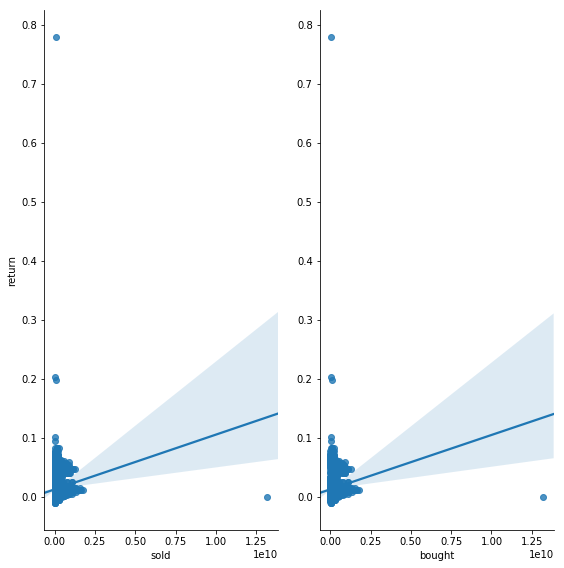

In [203]:
#taking some features and plotting against target labels. You can try it for all features.
sns.pairplot(trainr,x_vars=['sold','bought'],y_vars=['return'],size=8,aspect=0.5,kind='reg')

### Further train/test split the dataset and do the regular duties for implementing algorithm

In [204]:
x_trainr,x_testr,y_trainr,y_testr = train_test_split(trainr[feature_names_r],target_r,random_state=4)

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
linreg = LinearRegression()

In [207]:
linreg.fit(x_trainr,y_trainr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
predlin = linreg.predict(x_testr)

In [209]:
linreg.intercept_

-0.35902250909364281

In [210]:
linreg.coef_

array([ -6.56946255e-08,   1.58647792e-08,   7.40136980e-01,
         2.11328910e-03,  -1.58709008e-08,   2.62069383e-07,
        -1.78301894e-07])

## Evaluation methods for Regression

### Mean Squared error - has to be minimum

In [211]:
from sklearn.metrics import mean_squared_error

In [212]:
mean_squared_error(y_testr,predlin)

0.00015325576099495318

### Root Mean Squared error - Square root of MSE

In [213]:
np.sqrt(mean_squared_error(y_testr,predlin))

0.012379651085347809

# Feature selection in classification and regression 

In [214]:
from sklearn.feature_selection import SelectKBest,f_classif,f_regression

### For classification 
### k means top 'k' features to be selected 

In [215]:
selector_c = SelectKBest(f_classif, k=7)
selector_c.fit(trainc[feature_names],target)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [21 22 23 24 25 27 28 29 30 31 32 33 34 35 36] are constant.
  UserWarning)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=7, score_func=<function f_classif at 0x0000006731A512F0>)

In [216]:
scores_c = -np.log10(selector_c.pvalues_)

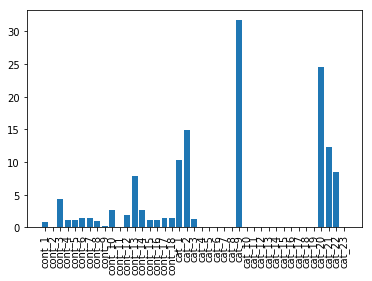

In [217]:
plt.bar(range(len(feature_names)), scores_c)
plt.xticks(range(len(feature_names)), feature_names, rotation='vertical')
plt.show()

### For regression 

In [218]:
selector_r = SelectKBest(f_regression, k=7)
selector_r.fit(trainr[feature_names_r],target_r)

SelectKBest(k=7, score_func=<function f_regression at 0x0000006731A51488>)

In [219]:
scores_r = -np.log10(selector_r.pvalues_)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


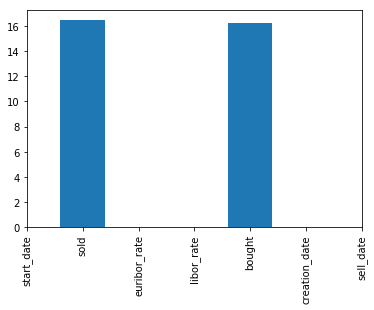

In [220]:
plt.bar(range(len(feature_names_r)), scores_r)
plt.xticks(range(len(feature_names_r)), feature_names_r, rotation='vertical')
plt.show()

## Thus,this notebook will make you understand the implementation of classification and regression algorithms in Python using sklearn package